## Jobsheet 4

*   Nama : Muhammad Ainur Riziq
*   Absen : 19
*   Kelas : TI 3E

<br>

## Praktikum 1
Klasifikasi SVM dengan Data Dummy

In [ ]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

*  Mengimpor NumPy untuk operasi array dan komputasi numerik.
* Mengimpor Matplotlib untuk membuat plot dan grafik.
* Mengimpor SciPy untuk fungsi statistik.
* Mengimpor Seaborn untuk visualisasi data yang menarik.

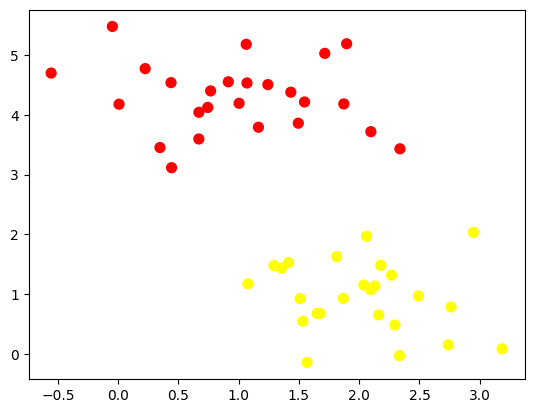

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

* `from sklearn.datasets import make_blobs`: Mengimpor fungsi **make_blobs** dari **scikit-learn** untuk membuat dataset sintetis berbentuk blob (cluster data).
* `X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)`: Membuat dataset dengan 50 sampel dan 2 cluster, menggunakan seed acak `random_state=0` agar hasilnya konsisten, dan standar deviasi `cluster_std=0.60` untuk mengontrol penyebaran titik.
* `plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')`: Membuat scatter plot dengan koordinat `X[:, 0]` untuk sumbu x dan `X[:, 1]` untuk sumbu y. Titik diberi warna sesuai kelas `y`, ukuran titik `50`, dan palet warna `autumn`.

(-1.0, 3.5)

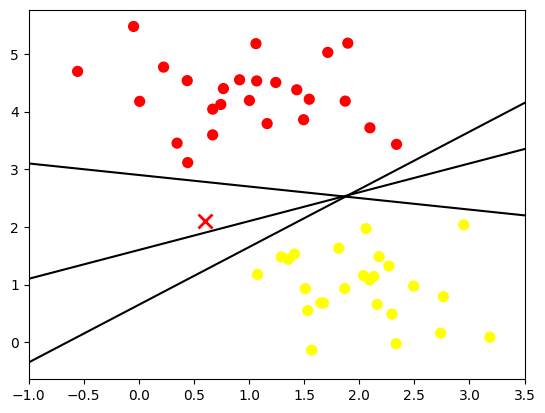

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

* `xfit = np.linspace(-1, 3.5)`: Membuat array nilai yang terdistribusi secara linier dari -1 hingga 3.5 untuk digunakan dalam plot garis.
* `plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')`: Membuat scatter plot dari data `X` dengan koordinat pada sumbu x (`X[:, 0]`) dan sumbu y (`X[:, 1]`), pewarnaan titik berdasarkan label `y`, ukuran titik 50, dan menggunakan palet warna 'autumn'.
* `plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)`: Memplot tanda 'x' merah di koordinat (0.6, 2.1) dengan lebar tepi 2 dan ukuran marker 10.
* `for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]: plt.plot(xfit, m * xfit + b, '-k')`: Membuat 3 garis lurus dengan kemiringan (`m`) dan titik potong sumbu y (`b`) yang berbeda. Setiap garis diplot dengan warna hitam ('-k').
* `plt.xlim(-1, 3.5)`: Mengatur batas tampilan sumbu x dari -1 hingga 3.5.

(-1.0, 3.5)

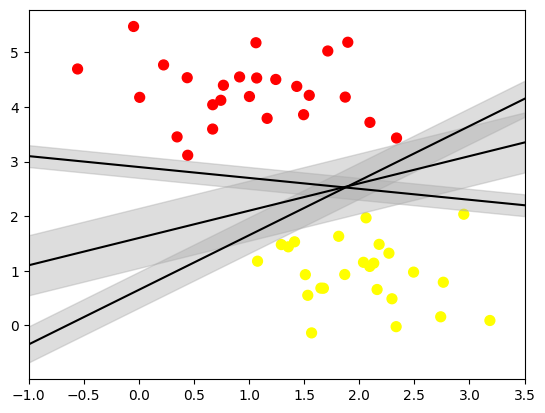

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

* `xfit = np.linspace(-1, 3.5)`: Membuat array nilai yang terdistribusi secara linier dari -1 hingga 3.5, yang digunakan untuk plot garis.

* `plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')`: Membuat scatter plot dengan koordinat dari data `X`. `X[:, 0]` untuk sumbu x dan `X[:, 1]` untuk sumbu y. Warna titik didasarkan pada label `y`, ukuran titik 50, dan palet warna 'autumn'.

* `for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]`: Looping melalui 3 set parameter yang terdiri dari `m` (kemiringan garis), `b` (titik potong sumbu y), dan `d` (lebar pita kesalahan).

* `yfit = m * xfit + b`: Menghitung nilai `yfit` dari persamaan garis lurus `y = m * x + b`.

* `plt.plot(xfit, yfit, '-k')`: Memplot garis lurus untuk setiap kombinasi `m` dan `b` menggunakan warna hitam ('-k').

* `plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)`: Membuat pita kesalahan (shaded region) di sekitar garis yang diplot, dengan batas atas dan bawah sebesar `yfit ± d`. Pita berwarna abu-abu dengan transparansi (`alpha=0.4`).

* `plt.xlim(-1, 3.5)`: Mengatur batas tampilan sumbu x dari -1 hingga 3.5.

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

* `from sklearn.svm import SVC`: Mengimpor **Support Vector Classifier** (`SVC`) dari **scikit-learn** untuk klasifikasi menggunakan metode Support Vector Machine (SVM).

* `model = SVC(kernel='linear', C=1E10)`: Membuat objek `SVC` dengan parameter:
   - `kernel='linear'`: Menggunakan kernel linear untuk pemisahan data.
   - `C=1E10`: Menetapkan parameter regulasi `C` yang sangat besar untuk menekankan pemisahan data yang keras (hard margin).

* `model.fit(X, y)`: Melatih model `SVC` dengan data `X` dan label `y`.

In [ ]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


* `def plot_svc_decision_function(model, ax=None, plot_support=True):` Mendefinisikan fungsi `plot_svc_decision_function` untuk menampilkan fitting data

* `if ax is None: ax = plt.gca()`: Jika `ax` tidak diberikan, menggunakan sumbu saat ini (`gca()`) dari Matplotlib.
* `xlim = ax.get_xlim()`: menyimpan batas x dari sumbu saat ini.

* `ylim = ax.get_ylim()`: Menyimpan batas y dari sumbu saat ini.

* `x = np.linspace(xlim[0], xlim[1], 30)`: Membuat array `x` dengan 30 nilai linier dalam rentang batas x.

* `y = np.linspace(ylim[0], ylim[1], 30)`: Membuat array `y` dengan 30 nilai linier dalam rentang batas y.

* `Y, X = np.meshgrid(y, x)`: Membuat grid 2D dari `x` dan `y` menggunakan `meshgrid`.

* `xy = np.vstack([X.ravel(), Y.ravel()]).T`: Mengubah grid 2D menjadi array 2D dari titik-titik (x, y) yang akan dievaluasi.

* `P = model.decision_function(xy).reshape(X.shape)`: Menghitung nilai fungsi keputusan model untuk setiap titik dalam grid dan mengubahnya kembali ke bentuk grid.

* `ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])`: Memplot kontur batas keputusan, dengan garis putus-putus untuk margin (`-1` dan `1`) dan garis solid untuk batas keputusan (`0`).

* `if plot_support: ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, linewidth=1, facecolors='none');`: Jika `plot_support` adalah `True`, memplot vektor dukungan model sebagai titik dengan ukuran 300, garis tepi 1, dan tanpa warna latar.

* `ax.set_xlim(xlim)`: Mengatur kembali batas x sumbu ke nilai asli.

* `ax.set_ylim(ylim)`: Mengatur kembali batas y sumbu ke nilai asli.

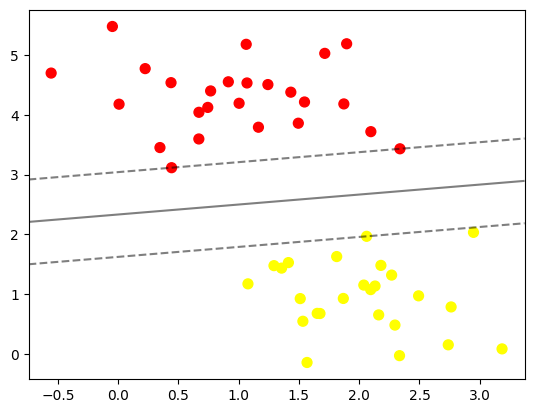

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

* `plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')`: Membuat scatter plot dari data `X` dengan koordinat `X[:, 0]` untuk sumbu x dan `X[:, 1]` untuk sumbu y. Titik diberi warna berdasarkan label `y`, dengan ukuran titik 50 dan palet warna 'autumn'.

* `plot_svc_decision_function(model)`: Memanggil fungsi `plot_svc_decision_function` untuk menampilkan fitting data

In [ ]:
# untuk mengetahui data yang masuk ke dalam support vector dapat dilakukan dengan memanggil support_vectors_

model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

*  `model.support_vectors_`: Mengakses atribut `support_vectors_` dari model SVC (`model`). yang merupakan titik-titik yang paling dekat dengan hyperplane pemisah dan menentukan margin model.

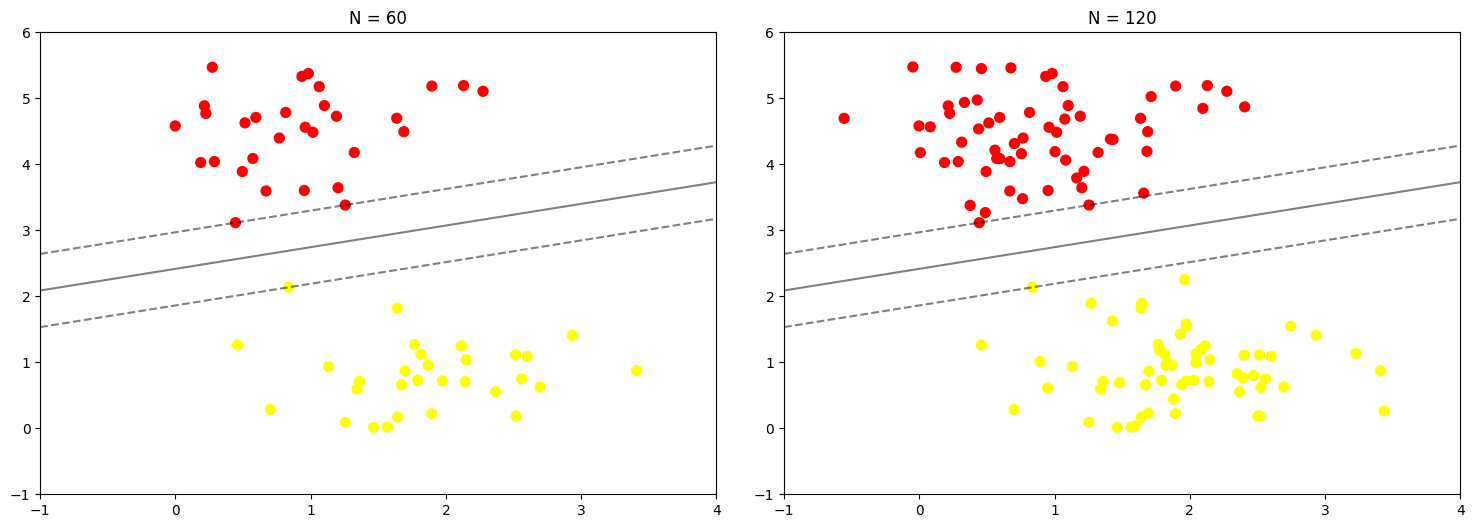

In [ ]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

* `def plot_svm(N=10, ax=None):` Mendefinisikan fungsi `plot_svm` yang membuat dan melatih model SVM serta memplot data dan batas keputusan.
  * `X, y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.60)`:  Membuat dataset dengan 200 sampel dan 2 cluster menggunakan `make_blobs`.
  * `X = X[:N]`: Memilih subset dari `X` dengan jumlah sampel sesuai `N`.
  * `y = y[:N]`: Memilih subset dari `y` dengan jumlah sampel sesuai `N`.
  * `model = SVC(kernel='linear', C=1E10)`: Membuat model SVC dengan kernel linear dan parameter regulasi `C` sangat besar.
  * `model.fit(X, y)`: Melatih model SVC menggunakan data `X` dan label `y`.
  * `ax = ax or plt.gca()`: Menggunakan sumbu saat ini (`gca()`) jika `ax` tidak diberikan.
  * `ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')`: Membuat scatter plot dari data `X` dengan warna berdasarkan label `y`, ukuran titik 50, dan palet warna 'autumn'.
  * `ax.set_xlim(-1, 4)`: Mengatur batas sumbu x dari -1 hingga 4.
  * `ax.set_ylim(-1, 6)`: Mengatur batas sumbu y dari -1 hingga 6.
  * `plot_svc_decision_function(model, ax)`: Memanggil fungsi `plot_svc_decision_function` untuk menampilkan batasan keputusan dan margin model SVC pada sumbu `ax`.

* `fig, ax = plt.subplots(1, 2, figsize=(16, 6))`: Membuat dua subplots berdampingan dengan ukuran figure 16x6 inci.

* `fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)`: Mengatur jarak dan batas untuk subplot.

* `for axi, N in zip(ax, [60, 120]):`Melakukan iterasi melalui setiap subplot `axi` dan nilai `N` (60 dan 120).

* `plot_svm(N, axi)`: Memanggil fungsi `plot_svm` untuk setiap subplot dengan nilai `N` yang berbeda.

* `axi.set_title('N = {0}'.format(N))`: Menetapkan judul untuk setiap subplot berdasarkan nilai `N`.

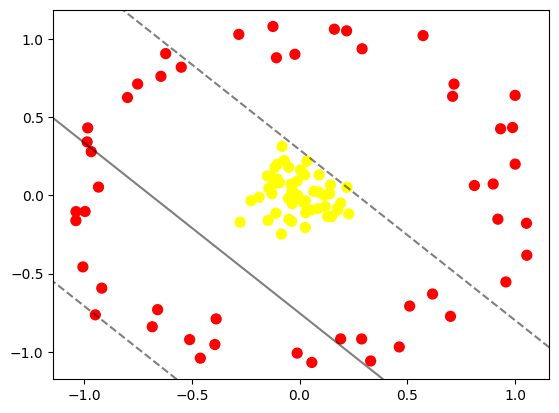

In [ ]:
# contoh data tidak terpisah secara linier

from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

* `from sklearn.datasets import make_circles`: Mengimpor fungsi `make_circles` dari **scikit-learn** untuk membuat dataset berbentuk lingkaran.
* `X, y = make_circles(100, factor=.1, noise=.1)`: Membuat dataset dengan 100 sampel yang membentuk dua lingkaran terpisah. Parameter: `factor=.1`: Mengontrol jarak antara dua lingkaran, `noise=.1`: Menambahkan sedikit noise untuk membuat data lebih realistis.
* `clf = SVC(kernel='linear').fit(X, y)`: Membuat model SVC dengan kernel linear dan melatihnya menggunakan data `X` dan label `y`.
* `plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')`:Membuat scatter plot dari data `X` dengan warna berdasarkan label `y`, ukuran titik 50, dan palet warna 'autumn'.

* `plot_svc_decision_function(clf, plot_support=False);`: Memanggil fungsi `plot_svc_decision_function` untuk menampilkan batasan keputusan model SVC pada plot. `plot_support=False` berarti vektor dukungan tidak ditampilkan pada plot.

In [ ]:
r = np.exp(-(X ** 2).sum(1))

- `r = np.exp(-(X ** 2).sum(1))`: Menghitung eksponensial dari negatif jumlah kuadrat fitur untuk setiap sampel di `X`.

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 0.28141884,  0.02654405],
       [-0.49641239, -0.9683219 ],
       [ 0.01401229,  0.16642265],
       [-0.86490106,  0.00916157],
       [ 0.98990678,  0.23302067],
       [ 0.04997183, -0.1934802 ],
       [-0.97864341, -0.24681447],
       [ 0.05902496,  0.24396249],
       [ 0.05147368,  0.0179322 ],
       [ 0.04218336, -0.07309962],
       [-0.96042338,  0.32722   ],
       [ 0.05247687,  0.01279364],
       [ 0.84192073,  0.24512729],
       [ 0.17412031,  0.06638604],
       [-0.22961055,  0.04576195],
       [-0.00990528, -0.12238307],
       [ 0.1717013 , -1.08541922],
       [ 0.22441342,  0.94313707],
       [-0.82384679, -0.09657633],
       [-0.66200281, -0.75667545],
       [ 0.00824998, -0.96473911],
       [ 0.18900824, -0.11519716],
       [-0.86533813,  0.34501035],
       [-0.19739754,  0.1243359 ],
       [ 0.0123976 ,  0.01338034],
       [-0.1009943 ,  0.99872878],
       [-0.21735635,  0.0405133 ],
       [ 1.02214595, -0.45106886],
       [ 0.51224015, -0.93657595],
       [-0.04935627,  0.13496442],
       [ 0.15203079,  0.15141342],
       [-0.1415764 , -0.05521394],
       [-0.92898184, -0.60066844],
       [-0.90136692, -0.37994679],
       [ 0.07512909,  0.84983244],
       [-0.00614508,  0.12791682],
       [-0.14806667,  0.00653294],
       [-0.37308838,  1.1389038 ],
       [-0.15881566, -0.03021176],
       [ 0.81745347,  0.60855503],
       [ 0.19434665, -0.07810251],
       [-0.29578115,  1.05329889],
       [ 0.13799144,  0.03107381],
       [-0.13622095,  1.12345457],
       [ 0.0330627 ,  0.12128885],
       [ 0.79058935, -0.56360542],
       [ 0.12463952, -0.01973227],
       [-0.01337945,  0.1974138 ],
       [ 0.46221031,  0.95057075],
       [-0.64560529,  0.71281433],
       [-0.02261443, -0.01470917],
       [-0.09914013, -0.31377309],
       [-0.03604534, -0.04556076],
       [ 0.80817681,  0.37007809],
       [-0.46915745,  0.89438689],
       [-0.96347998, -0.22321519],
       [-0.27421389, -0.06731421],
       [-0.28309078, -0.97642821],
       [ 0.09054015, -0.09579771],
       [ 0.62381188,  0.76794571],
       [ 0.19238897, -0.02501311],
       [-0.13467535, -0.08375772],
       [ 0.5309347 , -0.59665062],
       [ 0.45472299, -0.80176555],
       [-1.03252411,  0.24164487],
       [ 0.60344276, -0.81259691],
       [ 0.5880174 , -0.56115116],
       [ 0.81758608, -0.29749743],
       [-0.06721779,  0.03493682],
       [-0.676734  ,  0.83905794],
       [-0.02217903, -0.96570777],
       [-0.5303898 , -0.81446614],
       [-0.11013629,  0.24880063],
       [-0.02529073,  0.19351493],
       [ 0.05787436, -0.16545316],
       [-0.150968  , -0.14887772],
       [ 0.36634857,  0.93579829],
       [-0.11901885, -0.05234624],
       [ 0.99211613, -0.07977333],
       [-0.25583344, -0.804422  ],
       [ 0.91672117,  0.01106797],
       [ 0.03069525, -0.03711309],
       [-0.27963177,  0.06830621],
       [ 0.0967969 ,  1.02136013],
       [ 0.14334127,  0.13125718],
       [ 0.80594747, -0.70725632],
       [-0.89074582, -0.6280213 ],
       [-0.70192522,  0.76713049],
       [-0.09269547, -0.03693285],
       [ 0.1974661 , -0.22001491],
       [-0.05469709, -0.05540369],
       [ 0.13903993, -0.17374976],
       [ 0.15664555,  0.04926843],
       [-0.0648058 ,  0.11222946],
       [ 0.5330435 ,  0.79627143],
       [ 0.02002584, -0.06191263],
       [-0.4895741 , -0.95361164],
       [ 0.87001256,  0.45118044],
       [ 0.10501114,  0.29462331],
       [-0.10813314, -0.12285708]]), y=array([1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1]))>

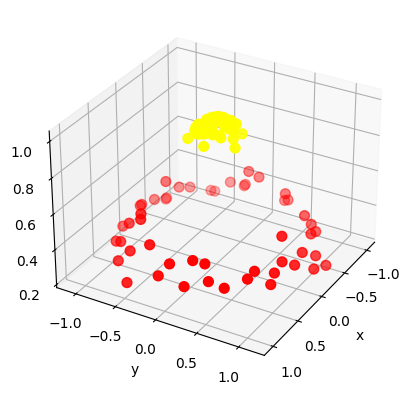

In [ ]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),
         X=fixed(X), y=fixed(y))

* `from mpl_toolkits import mplot3d`: Mengimpor toolkit 3D dari Matplotlib untuk plot tiga dimensi.
* `from ipywidgets import interact, fixed`: Mengimpor `interact` untuk membuat antarmuka interaktif dan `fixed` untuk mengunci nilai tetap dalam antarmuka.
* `def plot_3D(elev=30, azim=30, X=X, y=y):`Mendefinisikan fungsi `plot_3D` untuk membuat plot 3D dengan parameter `elev` (elevasi), `azim` (azimuth), data `X`, dan label `y`.
  * `ax = plt.subplot(projection='3d')`: Membuat subplot dengan proyeksi 3D.
  * `ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')`: Membuat scatter plot 3D dengan koordinat `X[:, 0]`, `X[:, 1]`, dan `r`, pewarnaan titik berdasarkan `y`, ukuran titik 50, dan palet warna 'autumn'.
  * `ax.view_init(elev=elev, azim=azim)`: Mengatur sudut pandang plot 3D dengan elevasi `elev` dan azimuth `azim`.
  * `ax.set_xlabel('x')`, `ax.set_ylabel('y')`, `ax.set_zlabel('r')`: Menetapkan label sumbu x, y, dan z.

* `interact(plot_3D, elev=[-90, 45, 30, 20, 10], azim=(-180, 180), X=fixed(X), y=fixed(y))`: Membuat antarmuka interaktif untuk fungsi `plot_3D`, memungkinkan pengguna untuk mengubah nilai `elev` dan `azim` secara dinamis, sementara `X` dan `y` tetap tetap.

In [ ]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

* `clf = SVC(kernel='rbf', C=1E6)`: Membuat model SVC dengan kernel Radial Basis Function (RBF) dan parameter regulasi `C` yang 1 juta

* `clf.fit(X, y)`: Melatih model SVC (`clf`) menggunakan data `X` dan label `y`.

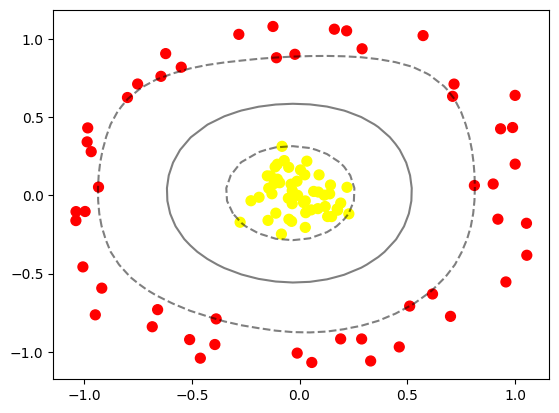

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

* `plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')`: Membuat scatter plot dari data `X` dengan warna berdasarkan label `y`, ukuran titik 50, dan palet warna 'autumn'.

* `plot_svc_decision_function(clf)`: Memplot batas keputusan dan margin dari model SVC (`clf`) menggunakan fungsi `plot_svc_decision_function`.
* `plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=300, lw=1, facecolors='none')`: Memplot vektor dukungan dari model SVC (`clf`) dengan ukuran 300, lebar garis 1, dan tanpa warna latar.

<br>

**data overlap**

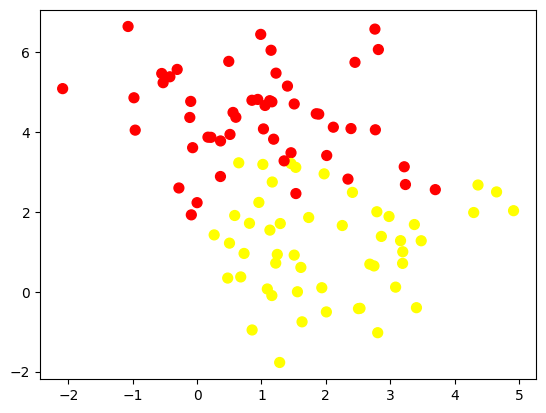

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

* `X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2)`:Membuat dataset dengan 100 sampel dan 2 pusat cluster menggunakan `make_blobs`, `n_samples=100`: Jumlah total sampel, `centers=2`: Jumlah pusat cluster, `random_state=0`: Menetapkan seed untuk keacakan yang dapat direproduksi,`cluster_std=1.2`: Menentukan deviasi standar cluster, mempengaruhi sebaran data dalam cluster.

* `plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');`:Membuat scatter plot dari data `X` dengan warna berdasarkan label `y`, ukuran titik 50, dan palet warna 'autumn'.

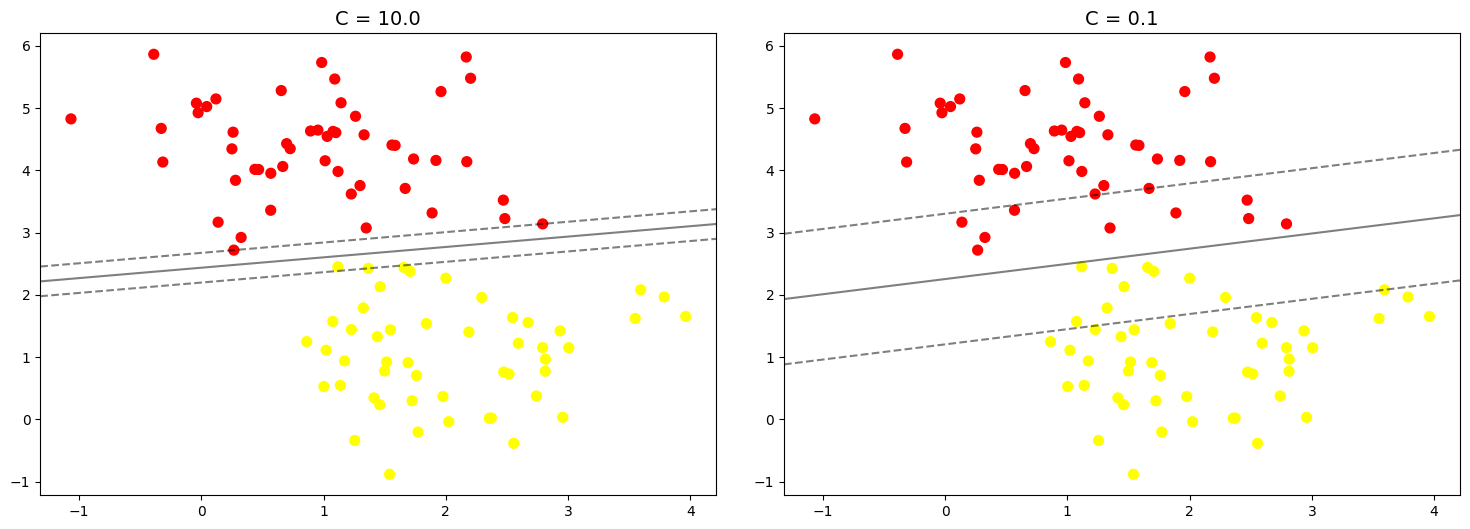

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

* `X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)`: Membuat dataset dengan 100 sampel dan 2 pusat cluster dengan deviasi standar 0.8.
* `fig, ax = plt.subplots(1, 2, figsize=(16, 6))`: Membuat dua subplot berdampingan dengan ukuran figure 16x6 inci.
* `fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)`: Mengatur jarak dan batas untuk subplot.
* `for axi, C in zip(ax, [10.0, 0.1]):`:Melakukan iterasi melalui setiap subplot (`axi`) dan nilai parameter `C` (10.0 dan 0.1).
*`model = SVC(kernel='linear', C=C).fit(X, y)`:Membuat dan melatih model SVC dengan kernel linear dan parameter regulasi `C`.
*`axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')`: Membuat scatter plot untuk data `X` pada subplot `axi`, dengan warna berdasarkan label `y`, ukuran titik 50, dan palet warna 'autumn'.
* `plot_svc_decision_function(model, axi)`: Memplot batas keputusan dan margin model SVC pada subplot `axi`.
* `axi.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, lw=1, facecolors='none');`: Memplot vektor dukungan model SVC sebagai titik dengan ukuran 300, lebar garis 1, dan tanpa warna latar pada subplot `axi`.
* `axi.set_title('C = {0:.1f}'.format(C), size=14)`: Menetapkan judul untuk setiap subplot berdasarkan nilai `C` dengan ukuran font 14.

## Praktikum 2

Klasifikasi SVM Pada Data Citra

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)


* Mengimpor fungsi `fetch_lfw_people` dari **scikit-learn** untuk memuat dataset gambar wajah dari Labeled Faces in the Wild (LFW).
* Mengambil dataset LFW dengan setidaknya 60 gambar per orang. Hasilnya disimpan dalam variabel `faces`.
* `print(faces.target_names)`: Mencetak nama-nama target (nama orang) yang ada dalam dataset.
* `print(len(faces.target_names))`: Mencetak jumlah nama target yang ada dalam dataset.
* `print(faces.images.shape)`: Mencetak bentuk array gambar, yang menunjukkan jumlah gambar, tinggi, dan lebar setiap gambar dalam dataset.

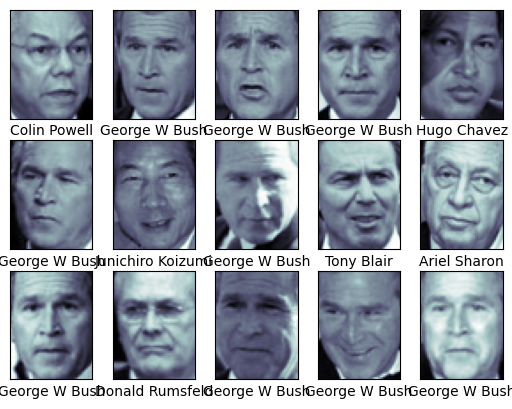

In [ ]:
# contoh wajah yang digunakan

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

* `fig, ax = plt.subplots(3, 5)`:Membuat grid subplot 3x5 dengan total 15 subplot untuk menampilkan gambar wajah.
* `for i, axi in enumerate(ax.flat):`:Melakukan iterasi melalui setiap subplot (`axi`) dalam array subplot datar (`ax.flat`).
* `axi.imshow(faces.images[i], cmap='bone')`: Menampilkan gambar wajah pada subplot `axi` dengan palet warna 'bone'.
* `axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])`:
Menghapus tanda pada sumbu x dan y, serta menetapkan label sumbu x dengan nama target yang sesuai untuk setiap gambar.

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

* Mengimpor kelas `SVC` dari **scikit-learn** untuk model Support Vector Classification (SVC).
* Mengimpor kelas `PCA` (Principal Component Analysis) dan menamakannya sebagai `RandomizedPCA` untuk melakukan reduksi dimensi.
* Mengimpor fungsi `make_pipeline` untuk membuat pipeline yang menggabungkan beberapa langkah pemrosesan.
* `pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)`: Membuat objek PCA dengan 150 komponen utama, melakukan whitening (normalisasi) pada data, dan menetapkan seed acak 42 untuk reproducibility.
* `svc = SVC(kernel='rbf', class_weight='balanced')`: Membuat model SVC dengan kernel Radial Basis Function (RBF) dan menyeimbangkan bobot kelas secara otomatis untuk mengatasi ketidakseimbangan kelas.
* `model = make_pipeline(pca, svc)`: Membuat pipeline yang pertama-tama menerapkan PCA untuk reduksi dimensi, kemudian menerapkan model SVC.

In [ ]:
# pemisahan data training dan data testing

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

* Mengimpor fungsi `train_test_split` dari **scikit-learn** untuk membagi dataset menjadi data pelatihan dan data pengujian.
* `Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)`:
   - Membagi data dan label (`faces.data` dan `faces.target`) menjadi data pelatihan (`Xtrain`, `ytrain`) dan data pengujian (`Xtest`, `ytest`).
   - `random_state=42`: Menetapkan seed acak 42 untuk memastikan hasil pembagian yang konsisten dan dapat direproduksi.

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

CPU times: user 1min 42s, sys: 23.8 s, total: 2min 6s
Wall time: 1min 36s
{'svc__C': 5, 'svc__gamma': 0.001}
0.828893332683022


* Mengimpor kelas `GridSearchCV` dari **scikit-learn** untuk melakukan pencarian hyperparameter dengan grid search.
* `param_grid = {'svc__C': [1, 5, 10, 50], 'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}`:
   - Mendefinisikan grid parameter untuk pencarian hyperparameter. Parameter ini akan diuji pada model SVC dalam pipeline: `'svc__C'`: Daftar nilai untuk parameter `C` dari SVC dan `'svc__gamma'`: Daftar nilai untuk parameter `gamma` dari SVC.
* `grid = GridSearchCV(model, param_grid)`:Membuat objek `GridSearchCV` dengan pipeline `model` dan grid parameter yang telah ditentukan.
* `%time grid.fit(Xtrain, ytrain)`:Melatih model menggunakan grid search dan mengukur waktu yang dibutuhkan untuk proses pelatihan.
* `print(grid.best_params_)`:Mencetak parameter terbaik yang ditemukan oleh grid search.
* `print(grid.best_score_)`:Mencetak skor terbaik yang diperoleh dengan parameter terbaik pada data pelatihan.

<br>

**prediksi label untuk data testing**

In [ ]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

* `model = grid.best_estimator_`: Mengambil model terbaik yang ditemukan oleh grid search (`grid`) dan menyimpannya dalam variabel `model`.
* `yfit = model.predict(Xtest)`: Menggunakan model terbaik (`model`) untuk memprediksi label dari data pengujian (`Xtest`) dan menyimpan hasil prediksi dalam variabel `yfit`.

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

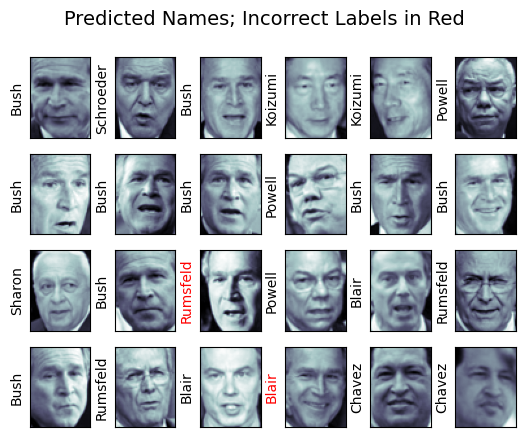

In [ ]:
# hasil label pada data testing

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

* `fig, ax = plt.subplots(4, 6)`: Membuat grid subplot 4x6 dengan total 24 subplot untuk menampilkan gambar wajah.
* `for i, axi in enumerate(ax.flat):`:Melakukan iterasi melalui setiap subplot (`axi`) dalam array subplot datar (`ax.flat`).
* `axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')`:
   - Menampilkan gambar wajah pada subplot `axi`, mengubah bentuk data `Xtest[i]` menjadi ukuran gambar (62x47) dan menggunakan palet warna 'bone'.
*  `axi.set(xticks=[], yticks=[])`:Menghapus tanda pada sumbu x dan y pada subplot `axi`.
* `axi.set_ylabel(faces.target_names[yfit[i]].split()[-1], color='black' if yfit[i] == ytest[i] else 'red')`:
   - Menetapkan label sumbu y pada subplot `axi` dengan nama target yang diprediksi (`yfit[i]`), menandai nama terakhir (misalnya, nama belakang).
   - Jika label yang diprediksi benar (`yfit[i] == ytest[i]`), label diberi warna hitam; jika tidak, warna merah.
*`fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)`: Menetapkan judul umum untuk figure, menjelaskan bahwa label yang diprediksi salah ditandai dengan warna merah.

<br>

contoh di atas hanya menunjukkan satu data dengan label salah. Secara pengukuran, performa klasifikasi dapat diketahui sebagai berikut

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



* Mengimpor fungsi `classification_report` dari **scikit-learn** untuk menghasilkan laporan klasifikasi.
* `print(classification_report(ytest, yfit, target_names=faces.target_names))`:
   - Mencetak laporan klasifikasi yang menunjukkan metrik performa model,
   - `ytest`: Label sebenarnya dari data pengujian.
   - `yfit`: Label yang diprediksi oleh model.
   - `target_names=faces.target_names`: Nama-nama target untuk menampilkan label kelas

Text(113.92222222222219, 0.5, 'predicted label')

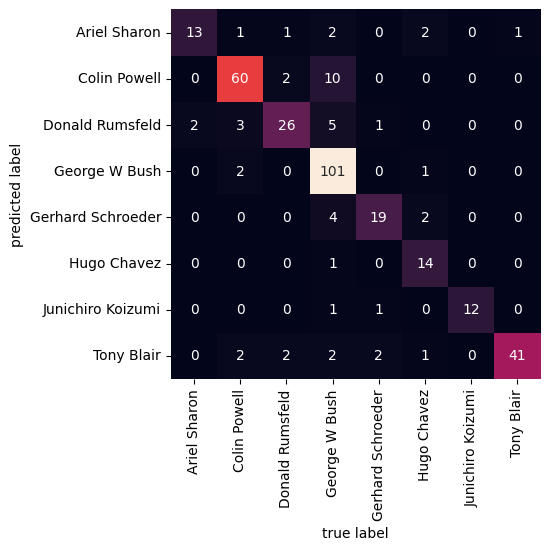

In [ ]:
# bentuk confusion matrix

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

* Mengimpor fungsi `confusion_matrix` dari **scikit-learn** untuk menghitung matriks kebingungan.
* `mat = confusion_matrix(ytest, yfit)`: Menghitung matriks kebingungan dari label sebenarnya (`ytest`) dan label yang diprediksi (`yfit`), menyimpannya dalam variabel `mat`.
* `sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=faces.target_names, yticklabels=faces.target_names)`:
* Menggunakan `seaborn` untuk membuat heatmap dari matriks kebingungan yang ditranspose (`mat.T`), menampilkan nilai angka di setiap sel (`annot=True`), dengan format desimal (`fmt='d'`), tanpa color bar (`cbar=False`), dan menambahkan label kelas pada sumbu x dan y.
* `plt.xlabel('true label')`: Menetapkan label sumbu x sebagai 'true label'
* `plt.ylabel('predicted label')`: Menetapkan label sumbu y sebagai 'predicted label'

## Praktikum 3

Klasifikasi Naive Bayes dengan Data Dummy


In [ ]:
import numpy as np
from sklearn.datasets import make_classification

# Membuat data dummy
# Hasil dari make_classification berupa data fitur X dan label y
# Label y akan berupa data yang sudah di encode (angka)
X,y = make_classification(n_samples=30, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_repeated=0, shuffle=False)

# Secara defalt, make_classfication menghasilkan nilai float
# Kita perlu merubah dalam bentuk diskrit

# Absolutekan nilai
X = np.absolute(X)

# Bulatkan nilai ke 2 angka dibelakang koma
# Kalikan dengan 100 supaya tidak ada lagi koma
X = np.round(X, 2) * 100

# Ubah ke dalam bentuk integer
X = X.astype(int)
print(X)
print(y)

[[ 76 190]
 [ 47 151]
 [ 90  37]
 [148   3]
 [107 125]
 [ 87 193]
 [118   5]
 [ 55 107]
 [252 220]
 [ 69 119]
 [182 227]
 [ 60  42]
 [216 195]
 [ 53  66]
 [ 92  59]
 [160 134]
 [ 62 199]
 [274   6]
 [122  68]
 [110  89]
 [107 103]
 [122 122]
 [  7 122]
 [105 310]
 [242  68]
 [150  43]
 [261  64]
 [158  16]
 [396 155]
 [ 94 322]]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1]


* Mengimpor library **NumPy** untuk operasi array dan matematika.
* Mengimpor fungsi `make_classification` dari **scikit-learn** untuk membuat dataset dummy untuk klasifikasi.
* `X, y = make_classification(n_samples=30, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_repeated=0, shuffle=False)`: Membuat dataset dummy dengan 30 sampel, 2 fitur, 2 kelas, dan semua fitur informatif. Hasilnya adalah data fitur (`X`) dan label (`y`).
* `X = np.absolute(X)`:
   - Mengubah nilai data fitur `X` menjadi nilai absolut untuk memastikan semua nilai positif.
* `X = np.round(X, 2) * 100`: Membulatkan nilai `X` hingga dua angka desimal, kemudian mengalikan dengan 100 untuk menghilangkan desimal dan mengubah nilai menjadi format diskrit.
* `X = X.astype(int)`:
   - Mengubah tipe data `X` menjadi integer setelah pembulatan dan perkalian.
* `print(X)`:
   - Mencetak data fitur `X` yang telah dimodifikasi.
* `print(y)`:
   - Mencetak label `y` yang dihasilkan dari `make_classification`.

<br>

**Membuat Data Frame**

In [ ]:
import pandas as pd

# Reshape label y menjadi 2D
# Hal ini dilakukan karena kita akan menggabungkannya dengan data fitur X
y_new = y.reshape(len(y), 1)

# Gabungkan fitur X dan label y dalam data array
data = np.concatenate((X, y_new), axis=1)

# Definisikan nama kolom
nama_kolom = ['Fitur 1', 'Fitur 2', 'Label']

# Buat Data Frame
df = pd.DataFrame(data, columns=nama_kolom)

# Cek Data Frame
df.head()

,Fitur 1,Fitur 2,Label
0,76,190,0
1,47,151,0
2,90,37,0
3,148,3,0
4,107,125,0


* Mengimpor library **Pandas** untuk manipulasi dan analisis data.
* `y_new = y.reshape(len(y), 1)`: Mengubah label `y` dari array 1D menjadi array 2D dengan satu kolom, agar dapat digabungkan dengan data fitur `X`.
* `data = np.concatenate((X, y_new), axis=1)`:Menggabungkan data fitur `X` dan label `y_new` secara horizontal (axis=1) menjadi satu array `data`.
* `nama_kolom = ['Fitur 1', 'Fitur 2', 'Label']`:Mendefinisikan nama kolom untuk data frame sebagai 'Fitur 1', 'Fitur 2', dan 'Label'.
* `df = pd.DataFrame(data, columns=nama_kolom)`:Membuat data frame **Pandas** dari array `data` dengan nama kolom yang telah didefinisikan.
* `df.head()`:Menampilkan 5 baris pertama dari data frame

<br>

untuk mempermudah pembacaan data, kita dapat mengubah bentuknya dalam bentuk kategorial

In [ ]:
# Definisikan nama label
labels = {
    1 : 'Kelas A',
    0 : 'Kelas B'
}

# Copy Data Frame untuk menyimpan Data Frame baru
# dengan label yang mudah untuk dibaca
df_label = df.copy()

# Ubah label dengan fungsi mapping dari Pandas
# pada Data Frame df_label
df_label['Label'] = df_label['Label'].map(labels)

# Cek Data Frame df_label
df_label.head()

,Fitur 1,Fitur 2,Label
0,76,190,Kelas B
1,47,151,Kelas B
2,90,37,Kelas B
3,148,3,Kelas B
4,107,125,Kelas B


* `labels = {1: 'Kelas A', 0: 'Kelas B'}`: Mendefinisikan dictionary `labels` yang memetakan nilai label integer (0 dan 1) ke label 'Kelas A' dan 'Kelas B'.
* `df_label = df.copy()`: Membuat salinan dari data frame `df` untuk menyimpan data frame baru tanpa mengubah data asli.
* `df_label['Label'] = df_label['Label'].map(labels)`: Mengubah kolom 'Label' dalam data frame `df_label` dengan menggunakan fungsi `map` dari Pandas untuk mengganti nilai label integer dengan deskripsi label menggunakan dictionary `labels`.
* `df_label.head()`: Menampilkan 5 baris pertama dari data frame `df_label`

<br>

**Visualisasi Data**

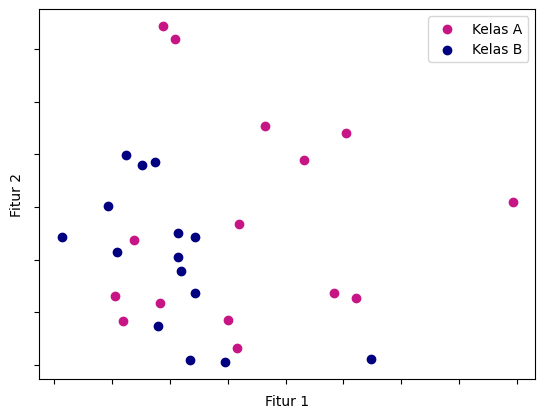

In [ ]:
import matplotlib.pyplot as plt

# Definisikan warna untuk setiap kelas
colors = {
    'class_a': 'MediumVioletRed',
    'class_b': 'Navy'
}

# Kelompokkan label berdasarkan nama kelas
gb = df_label.groupby(['Label'])
class_a = gb.get_group('Kelas A')
class_b = gb.get_group('Kelas B')

# Plot
plt.scatter(x=class_a['Fitur 1'], y=class_a['Fitur 2'], c=colors['class_a'])
plt.scatter(x=class_b['Fitur 1'], y=class_b['Fitur 2'], c=colors['class_b'])
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.legend(['Kelas A', 'Kelas B'])
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

* Mengimpor library **Matplotlib** untuk visualisasi data.
* `colors = {'class_a': 'MediumVioletRed', 'class_b': 'Navy'}`: Mendefinisikan dictionary `colors` untuk menetapkan warna yang akan digunakan dalam plot untuk setiap kelas.
* `gb = df_label.groupby(['Label'])`: Mengelompokkan data frame `df_label` berdasarkan kolom 'Label', menyimpannya dalam objek grup `gb`.
* `class_a = gb.get_group('Kelas A')`:Mengambil subset data dari grup `gb` yang berlabel 'Kelas A', menyimpannya dalam data frame `class_a`.
* `class_b = gb.get_group('Kelas B')`: Mengambil subset data dari grup `gb` yang berlabel 'Kelas B', menyimpannya dalam data frame `class_b`.
* `plt.scatter(x=class_a['Fitur 1'], y=class_a['Fitur 2'], c=colors['class_a'])`:Membuat plot sebar (scatter plot) untuk data `class_a` dengan warna yang ditentukan (`colors['class_a']`).
* `plt.scatter(x=class_b['Fitur 1'], y=class_b['Fitur 2'], c=colors['class_b'])`: Membuat plot sebar (scatter plot) untuk data `class_b` dengan warna yang ditentukan (`colors['class_b']`).
* `plt.xlabel('Fitur 1')`:Menetapkan label sumbu x sebagai 'Fitur 1'.
* `plt.ylabel('Fitur 2')`:Menetapkan label sumbu y sebagai 'Fitur 2'.
* `plt.legend(['Kelas A', 'Kelas B'])`:Menambahkan legenda untuk membedakan antara 'Kelas A' dan 'Kelas B'.
* `plt.gca().axes.xaxis.set_ticklabels([])`:Menghapus label sumbu x pada plot.
* `plt.gca().axes.yaxis.set_ticklabels([])`:Menghapus label sumbu y pada plot.
* `plt.show()`:Menampilkan plot.

<br>

**Klasifikasi Multinomial Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB # class untuk model MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # evaluasi model berdasarkan akurasi

# Inisiasi obyek MultinomialNB
mnb = MultinomialNB()

# Kita dapat langsung menggunakan fitur X dan label y
# hasil dari proses pembuatan data dummy

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=30)

# Fit model
# Label y harus dalam bentuk 1D atau (n_samples,)
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred = mnb.predict(X_train)

# Evaluasi akurasi training
acc_train = accuracy_score(y_train, y_train_pred)

# Prediksi test data
y_test_pred = mnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test = accuracy_score(y_test, y_test_pred)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.5714285714285714
Hasil akurasi data test: 0.2222222222222222


* Mengimpor kelas `MultinomialNB` dari **scikit-learn** untuk membuat model klasifikasi Naive Bayes berbasis multinomial.
* Mengimpor fungsi `train_test_split` dari **scikit-learn** untuk membagi dataset menjadi data pelatihan dan data pengujian.
* Mengimpor fungsi `accuracy_score` dari **scikit-learn** untuk mengevaluasi performa model berdasarkan akurasi.
* `mnb = MultinomialNB()`: Menginisialisasi objek model `MultinomialNB`.
* `X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)`: Membagi dataset menjadi data pelatihan (`X_train`, `y_train`) dan data pengujian (`X_test`, `y_test`) dengan 30% data sebagai data pengujian.
* `mnb.fit(X_train, y_train)`:Melatih model `MultinomialNB` dengan data pelatihan `X_train` dan label `y_train`.
* `y_train_pred = mnb.predict(X_train)`:Memprediksi label untuk data pelatihan `X_train` menggunakan model yang telah dilatih.
* `acc_train = accuracy_score(y_train, y_train_pred)`:Menghitung akurasi model pada data pelatihan dengan membandingkan label sebenarnya (`y_train`) dengan label yang diprediksi (`y_train_pred`).
* `y_test_pred = mnb.predict(X_test)`:Memprediksi label untuk data pengujian `X_test` menggunakan model yang telah dilatih.
* `acc_test = accuracy_score(y_test, y_test_pred)`:Menghitung akurasi model pada data pengujian dengan membandingkan label sebenarnya (`y_test`) dengan label yang diprediksi (`y_test_pred`).
* `print(f'Hasil akurasi data train: {acc_train}')`:Mencetak hasil akurasi pada data pelatihan.
* `print(f'Hasil akurasi data test: {acc_test}')`:Mencetak hasil akurasi pada data pengujian.

<br>

**Klasifikasi Gaussian Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB # class untuk model GaussianNB

# Inisiasi obyek Gaussian
gnb = GaussianNB()

# Kita menggunakan split data training dan testing
# yang sama dengan model multinomial

# Fit model
# Label y harus dalam bentu 1D atau (n_samples,)
gnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred_gnb = gnb.predict(X_train)

# Evaluasi akurasi training
acc_train_gnb = accuracy_score(y_train, y_train_pred_gnb)

# Prediksi test data
y_test_pred_gnb = gnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test_gnb = accuracy_score(y_test, y_test_pred_gnb)

# Print hasil evaluasi
print(f'Hasil akurasi data train (Gaussian): {acc_train_gnb}')
print(f'Hasil akurasi data test (Gaussian): {acc_test_gnb}')

Hasil akurasi data train (Gaussian): 0.6190476190476191
Hasil akurasi data test (Gaussian): 0.3333333333333333


* Mengimpor kelas `GaussianNB` dari **scikit-learn** untuk membuat model klasifikasi Naive Bayes berbasis distribusi Gaussian (normal).
* `gnb = GaussianNB()`:Menginisialisasi objek model `GaussianNB`.
* `gnb.fit(X_train, y_train)`:Melatih model `GaussianNB` dengan data pelatihan `X_train` dan label `y_train`.
* `y_train_pred_gnb = gnb.predict(X_train)`:Memprediksi label untuk data pelatihan `X_train` menggunakan model `GaussianNB` yang telah dilatih.
* `acc_train_gnb = accuracy_score(y_train, y_train_pred_gnb)`:Menghitung akurasi model `GaussianNB` pada data pelatihan dengan membandingkan label sebenarnya (`y_train`) dengan label yang diprediksi (`y_train_pred_gnb`).
* `y_test_pred_gnb = gnb.predict(X_test)`: Memprediksi label untuk data pengujian `X_test` menggunakan model `GaussianNB` yang telah dilatih.
* `acc_test_gnb = accuracy_score(y_test, y_test_pred_gnb)`:Menghitung akurasi model `GaussianNB` pada data pengujian dengan membandingkan label sebenarnya (`y_test`) dengan label yang diprediksi (`y_test_pred_gnb`).
* `print(f'Hasil akurasi data train (Gaussian): {acc_train_gnb}')`:Mencetak hasil akurasi pada data pelatihan untuk model `GaussianNB`.
* `print(f'Hasil akurasi data test (Gaussian): {acc_test_gnb}')`:Mencetak hasil akurasi pada data pengujian untuk model `GaussianNB`.

## Praktikum 4

Klasifikasi Naive Bayes Pada Data Multinomial

**Load Data**

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('data/spam.csv', encoding='latin-1') # spesifiksi encoding diperlukan karena data tidak menggunakan UTF-8

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


* Mengimpor library **NumPy** untuk manipulasi array dan operasi matematis.
* Mengimpor library **Pandas** untuk manipulasi dan analisis data dalam format tabel (DataFrame).
* `df = pd.read_csv('spam.csv', encoding='latin-1')`: Membaca file CSV bernama `spam.csv` dan menyimpannya dalam DataFrame `df`. Parameter `encoding='latin-1'` digunakan untuk memastikan data yang tidak menggunakan encoding UTF-8 dibaca dengan benar.
* `df.head()`:Menampilkan lima baris pertama dari DataFrame

<br>

**Drop Kolom**


In [ ]:
# Drop 3 kolom terakhir dengan fungsi iloc
df = df.drop(df.iloc[:,2:], axis=1)

# Cek data
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


* `df = df.drop(df.iloc[:, 2:], axis=1)`: Menghapus kolom-kolom terakhir dari DataFrame `df`, `df.iloc[:, 2:]` memilih semua kolom mulai dari indeks ke-2 hingga akhir,  `axis=1` menunjukkan bahwa operasi dilakukan pada kolom.
* `df.head()`: Menampilkan lima baris pertama dari DataFrame `df`

<br>

**Ubah Nama Kolom V1 dan V2**

In [ ]:
# Data untuk rename kolom v1 dan v2
new_cols = {
    'v1': 'Labels',
    'v2': 'SMS'
}

# Rename nama kolom v1 dan v2
df = df.rename(columns=new_cols)

# cek data
df.head()

,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


* `new_cols = {'v1': 'Labels', 'v2': 'SMS'}`: Membuat dictionary `new_cols` yang memetakan nama kolom lama (`v1`, `v2`) ke nama kolom baru (`Labels`, `SMS`).
* `df = df.rename(columns=new_cols)`:Mengganti nama kolom dalam DataFrame `df` sesuai dengan pemetaan yang diberikan dalam dictionary `new_cols`.
* `df.head()`:Menampilkan lima baris pertama dari DataFrame

<br>

**Inspeksi Data**

In [ ]:
# Cek Jumlah Data Per Kelas
print(df['Labels'].value_counts())
print('\n')

# Cek Kelengkapan Data
print(df.info())
print('\n')

# Cek Statistik Deskriptif
print(df.describe())

Labels
ham     4825
spam     747
Name: count, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Labels  5572 non-null   object
 1   SMS     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


       Labels                     SMS
count    5572                    5572
unique      2                    5169
top       ham  Sorry, I'll call later
freq     4825                      30


* `print(df['Labels'].value_counts())`:Menampilkan jumlah data untuk setiap kelas dalam kolom `Labels`.
* `print(df.info())`:Menampilkan informasi umum tentang DataFrame
* `print(df.describe())`: Menampilkan statistik deskriptif untuk kolom numerik dalam DataFrame

<br>

**Encode Label**

In [ ]:
# Data untuk label
new_labels = {
    'spam': 1,
    'ham': 0
}

# Encode label
df['Labels'] = df['Labels'].map(new_labels)

# Cek data
df.head()

,Labels,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


* `new_labels = {'spam': 1, 'ham': 0}`: Membuat dictionary `new_labels` yang memetakan label teks (`spam`, `ham`) ke label numerik (`1`, `0`).
* `df['Labels'] = df['Labels'].map(new_labels)`:Mengganti nilai-nilai dalam kolom `Labels` sesuai dengan pemetaan yang diberikan dalam dictionary `new_labels`. Ini mengubah label teks menjadi angka.
* `df.head()`:Menampilkan lima baris pertama dari DataFrame

<br>

**Memisahkan Fitur dengan Label**

In [ ]:
X = df['SMS'].values
y = df['Labels'].values

* `X = df['SMS'].values`: Mengambil nilai-nilai dari kolom `SMS` dalam DataFrame `df` dan menyimpannya dalam array NumPy `X`
* `y = df['Labels'].values`: Mengambil nilai-nilai dari kolom `Labels` dalam DataFrame `df` dan menyimpannya dalam array NumPy `y`

<br>

**Ekstraksi fitur**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Inisiasi CountVectorizer
bow = CountVectorizer()

# Fitting dan transform X_train dengan CountVectorizer
X_train = bow.fit_transform(X_train)

# Transform X_test
# Mengapa hanya transform? Alasan yang sama dengan kasus pada percobaan ke-3
# Kita tidak menginginkan model mengetahui paramter yang digunakan oleh CountVectorizer untuk fitting data X_train
# Sehingga, data testing dapat tetap menjadi data yang asing bagi model nantinya
X_test = bow.transform(X_test)

* Mengimpor fungsi `train_test_split` dari scikit-learn untuk membagi dataset menjadi data pelatihan dan pengujian.
* Mengimpor `CountVectorizer` dari scikit-learn untuk mengubah teks menjadi fitur numerik menggunakan metode Bag-of-Words.
*  `X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)`:Membagi data fitur `X` dan label `y` menjadi data pelatihan (80%) dan data pengujian (20%). Parameter `random_state=50` memastikan pembagian yang konsisten setiap kali kode dijalankan.
* `bow = CountVectorizer()`:Membuat instance `CountVectorizer` untuk mengubah teks menjadi fitur numerik berdasarkan frekuensi kata.
* `X_train = bow.fit_transform(X_train)`:Mengaplikasikan `fit_transform` pada data pelatihan `X_train` untuk mengubah teks menjadi fitur numerik dan menyimpannya dalam `X_train`.
*  `X_test = bow.transform(X_test)`: Mengaplikasikan `transform` pada data pengujian `X_test` untuk mengubah teks menjadi fitur numerik menggunakan kosakata yang dipelajari dari data pelatihan.

In [ ]:
print(len(bow.get_feature_names_out()))
print(f'Dimensi data: {X_train.shape}')

7727
Dimensi data: (4457, 7727)


* `print(len(bow.get_feature_names_out()))`: Menampilkan jumlah fitur (kata unik) yang telah dipelajari oleh `CountVectorizer` dari data pelatihan `X_train`.

2. `print(f'Dimensi data: {X_train.shape}')`:Menampilkan dimensi data pelatihan `X_train`, yaitu jumlah baris (dokumen) dan jumlah kolom (fitur) setelah proses transformasi dengan `CountVectorizer`.

<br>

**Training dan Evaluasi Model**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Inisiasi MultinomialNB
mnb = MultinomialNB()

# Fit model
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_pred_train = mnb.predict(X_train)

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data training
y_pred_test = mnb.predict(X_test)

# Evaluasi akurasi data training
acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.9946152120260264
Hasil akurasi data test: 0.9775784753363229


* Mengimpor kelas `MultinomialNB` dari scikit-learn untuk model klasifikasi Naive Bayes dengan distribusi multinomial.
* Mengimpor fungsi `accuracy_score` dari scikit-learn untuk menghitung akurasi model.
* `mnb = MultinomialNB()`: Membuat instance dari model `MultinomialNB`.
* `mnb.fit(X_train, y_train)`: Melatih model Naive Bayes dengan data pelatihan `X_train` dan label `y_train`.
* `y_pred_train = mnb.predict(X_train)`:Menghasilkan prediksi untuk data pelatihan `X_train` menggunakan model yang telah dilatih.
* `acc_train = accuracy_score(y_train, y_pred_train)`: Menghitung akurasi model pada data pelatihan dengan membandingkan label asli `y_train` dan prediksi `y_pred_train`.
* `y_pred_test = mnb.predict(X_test)`:Menghasilkan prediksi untuk data pengujian `X_test` menggunakan model yang telah dilatih.
* `acc_test = accuracy_score(y_test, y_pred_test)`: Menghitung akurasi model pada data pengujian dengan membandingkan label asli `y_test` dan prediksi `y_pred_test`.
* `print(f'Hasil akurasi data train: {acc_train}')`: Menampilkan hasil akurasi model pada data pelatihan.
* `print(f'Hasil akurasi data test: {acc_test}')`: Menampilkan hasil akurasi model pada data pengujian.

## Praktikum 5

Klasifikasi Citra Siang dan Malam

### Langkah 0 - Import Library



In [ ]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

- **Pathlib**: manipulasi path file.
- **Matplotlib**: baca dan tampilkan gambar, visualisasi data.
- **OpenCV (cv2)**: pengolahan citra.
- **Random**: pengacakan data.
- **NumPy**: operasi numerik pada array.
- **Pandas**: manipulasi dan analisis data dalam tabel.

In [3]:
# Image directories
train_dir = "images/training/"
test_dir = "images/test/"


* train_dir: Jalur ke direktori yang berisi gambar-gambar untuk pelatihan model .
* test_dir: Jalur ke direktori yang berisi gambar-gambar untuk pengujian model .

### Langkah 1 - Load Data dan Visualisasikan


In [4]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

- **`p = Path(img_dir)`**: Mengubah string jalur direktori menjadi objek `Path` untuk mempermudah penanganan file dan folder.

- **`dirs = p.glob('*')`**: Menemukan semua subdirektori dalam direktori utama yang mewakili kategori atau label gambar.

- **`img_list = []`**: Menginisialisasi daftar kosong untuk menyimpan pasangan gambar dan label.

- **`for dir in dirs:`**: Iterasi melalui setiap subdirektori (label kategori).

- **`label = str(dir).split('/')[-1]`**: Mengambil nama folder sebagai label kelas.

- **`for file in dir.glob('*.jpg'):`**: Iterasi melalui semua file gambar berformat `.jpg` di setiap subdirektori.

- **`img = mpimg.imread(file)`**: Membaca gambar dari file menggunakan `matplotlib.image.imread`.

- **`if not img is None:`**: Memastikan bahwa gambar yang di-load tidak kosong atau rusak.

- **`img_list.append((img, label))`**: Menyimpan tuple (gambar, label) ke dalam list.

- **`return img_list`**: Mengembalikan daftar pasangan gambar dan label.


In [5]:
# Load training data
train_img = load_dataset(train_dir)

* train_img = load_dataset(train_dir) akan memuat gambar-gambar dari direktori pelatihan dan mengaitkannya dengan labelnya menggunakan fungsi load_dataset

In [6]:
# Check the first data
# It should be a tuple consist of arrays of image and image labels
train_img[0]

(array([[[ 55,  37,  25],
         [ 55,  37,  25],
         [ 55,  37,  25],
         ...,
         [ 75,  49,  34],
         [ 75,  49,  34],
         [ 75,  49,  34]],
 
        [[ 55,  37,  25],
         [ 55,  37,  25],
         [ 55,  37,  25],
         ...,
         [ 75,  49,  34],
         [ 75,  49,  34],
         [ 75,  49,  34]],
 
        [[ 55,  37,  25],
         [ 55,  37,  25],
         [ 55,  37,  25],
         ...,
         [ 75,  49,  34],
         [ 75,  49,  34],
         [ 75,  49,  34]],
 
        ...,
 
        [[180, 113,  70],
         [153,  95,  49],
         [143,  97,  47],
         ...,
         [119,  65,  21],
         [119,  65,  21],
         [119,  65,  21]],
 
        [[148,  86,  47],
         [194, 141,  99],
         [153, 112,  66],
         ...,
         [117,  64,  22],
         [117,  64,  22],
         [117,  64,  22]],
 
        [[171, 113,  75],
         [251, 199, 159],
         [220, 183, 139],
         ...,
         [117,  64,  22],
  

* train_img[0]: mencoba melihat data pertama dalam daftar train_img.

In [7]:
# Random size checking
pick_random = np.random.randint(0, len(train_img))

# Check img size
print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)

Image 26
(591, 800, 3)


* pick_random = np.random.randint(0, len(train_img)): Memilih indeks secara acak dari daftar train_img.
* train_img[pick_random][0].shape: Menampilkan bentuk (dimensi) dari gambar yang dipilih.

In [42]:
# Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

* rand_num = np.random.randint(0, len(img_list)): Memilih indeks gambar secara acak dari daftar img_list.
* img = img_list[rand_num][0]: Mengambil gambar pada indeks yang dipilih secara acak.
* label = img_list[rand_num][1]: Mengambil label gambar pada indeks yang dipilih secara acak.
* label_str = 'day' if label == 1 else 'night': Mengonversi label numerik menjadi string yang lebih mudah dibaca ('day' atau 'night').
* plt.imshow(img): Menampilkan gambar.
* print(f'Shape\t: {img.shape}'): Mencetak dimensi gambar.
* print(f'Label\t: {label}'): Mencetak label gambar.



Shape	: (700, 1280, 3)
Label	: night


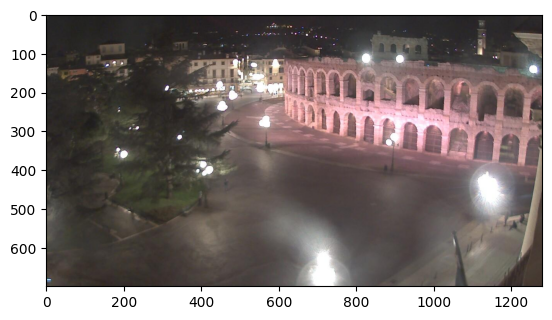

In [11]:
random_img_viz(train_img)

* random_img_viz(train_img) akan menampilkan gambar secara acak dari daftar `train_img` dan mencetak informasi mengenai dimensi gambar dan labelnya.

## Langkah 3 - Pra Pengolahan Data


In [12]:
def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))

    return std_img

Fungsi **`standarized_input(image)`** digunakan untuk mengubah ukuran gambar menjadi ukuran standar.

- **`std_img = cv2.resize(image, (1100,600))`**: Mengubah ukuran gambar `image` menjadi 1100 piksel (lebar) x 600 piksel (tinggi).

- **`return std_img`**: Mengembalikan gambar yang telah diubah ukurannya.

In [13]:
def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1

    return num_val

Fungsi **`label_encoder(label)`** digunakan untuk mengonversi label kategori menjadi nilai numerik.

- **`num_val = 0`**: Inisialisasi variabel untuk menyimpan nilai numerik dari label.

- **`if(label == 'day'):`**: Mengecek apakah label adalah `'day'`.

  - **`num_val = 1`**: Jika label adalah `'day'`, maka `num_val` diatur menjadi 1.

- **`return num_val`**: Mengembalikan nilai numerik yang sesuai dengan label kategori.

In [14]:
def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))

    return std_img_list

Fungsi **`preprocess(img_list)`** digunakan untuk memproses dan menstandarisasi gambar serta mengonversi label ke dalam format numerik.

- **`std_img_list = []`**: Inisialisasi daftar kosong untuk menyimpan gambar yang telah diproses dan labelnya.

- **`for item in img_list:`**: Mengiterasi setiap elemen dalam `img_list`.

  - **`image = item[0]`**: Mengambil gambar dari elemen `item`.

  - **`label = item[1]`**: Mengambil label dari elemen `item`.

  - **`std_img = standarized_input(image)`**: Mengubah ukuran gambar menggunakan fungsi `standarized_input`.

  - **`img_label = label_encoder(label)`**: Mengonversi label ke nilai numerik menggunakan fungsi `label_encoder`.

  - **`std_img_list.append((std_img, img_label))`**: Menambahkan tuple yang berisi gambar yang telah diproses dan label numeriknya ke dalam `std_img_list`.

- **`return std_img_list`**: Mengembalikan daftar gambar yang telah diproses dan labelnya.

In [15]:
train_std_img_list = preprocess(train_img)

- **`preprocess(train_img)`**: Memanggil fungsi `preprocess` dengan `train_img` sebagai input.
  

In [16]:
# Random size checking
pick_random = np.random.randint(0, len(train_std_img_list))

# Check img size
print(f'Image {pick_random}')
print(train_std_img_list[pick_random][0].shape)

Image 73
(600, 1100, 3)


- **`np.random.randint(0, len(train_std_img_list))`**: Menghasilkan angka acak antara 0 dan jumlah gambar dalam `train_std_img_list`

- Perintah **`print(f'Image {pick_random}')`** dan **`print(train_std_img_list[pick_random][0].shape)`** akan:

- **`print(f'Image {pick_random}')`**: Menampilkan indeks gambar yang dipilih secara acak.

- **`print(train_std_img_list[pick_random][0].shape)`**: Menampilkan bentuk (dimensi) gambar yang dipilih secara acak dari daftar `train_std_img_list`

Shape	: (600, 1100, 3)
Label	: 0


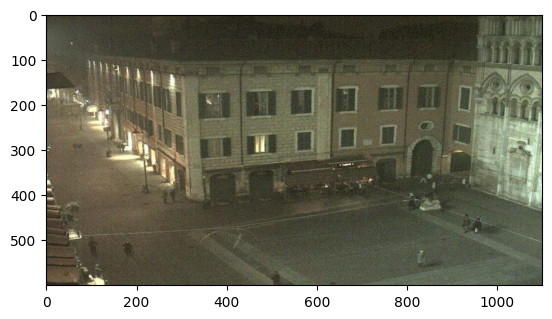

In [17]:
random_img_viz(train_std_img_list)

* random_img_viz(train_std_img_list): Memanggil fungsi random_img_viz dengan parameter train_std_img_list.

## Langkah 4 - Ekstraksi Fitur


In [18]:
# Get feature based on average brightness using HSV colorspace
def avg_brightness(image):
    # Convert image to HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Calculate the avg of brightness
    sum_brightness = np.sum(img_hsv[:,:,2]) # take the 3rb value which is the V channel
    area = image.shape[0] * image.shape[1]
    avg = sum_brightness / area

    return avg

- **`def avg_brightness(image):`**: Mendefinisikan fungsi `avg_brightness` yang menerima gambar (`image`) sebagai argumen.
- **`img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)`**: Mengonversi gambar dari ruang warna RGB ke HSV (Hue, Saturation, Value) menggunakan OpenCV.
- **`sum_brightness = np.sum(img_hsv[:,:,2])`**: Menghitung jumlah total nilai kecerahan (brightness) dari saluran `V` (Value) di ruang warna HSV.
- **`area = image.shape[0] * image.shape[1]`**: Menghitung luas gambar (jumlah piksel) berdasarkan dimensi gambar.
- **`avg = sum_brightness / area`**: Menghitung rata-rata kecerahan dengan membagi total kecerahan dengan luas gambar.
- **`return avg`**: Mengembalikan nilai rata-rata kecerahan gambar.

Image 29
Avg Brighness: 24.5015


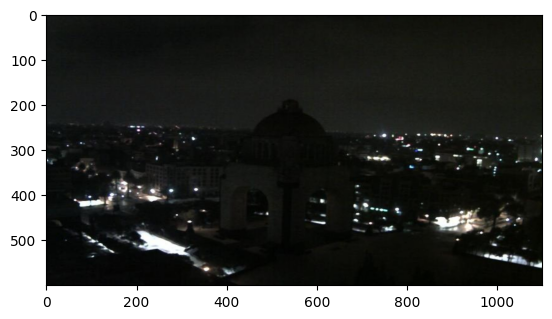

In [19]:
# Check on random image
rand_img = np.random.randint(0, len(train_std_img_list))

feature_img = train_std_img_list[rand_img][0]

avg_img = avg_brightness(feature_img)

print(f'Image {rand_img}')
print(f'Avg Brighness: {avg_img:.4f}')
plt.imshow(feature_img)

- **`rand_img = np.random.randint(0, len(train_std_img_list))`**: Memilih sebuah indeks acak dari daftar gambar yang telah diproses (`train_std_img_list`).

- **`feature_img = train_std_img_list[rand_img][0]`**: Mengambil gambar dari daftar gambar yang telah diproses menggunakan indeks acak.

- **`avg_img = avg_brightness(feature_img)`**: Menghitung nilai rata-rata kecerahan dari gambar yang dipilih menggunakan fungsi `avg_brightness`.

- **`print(f'Image {rand_img}')`**: Menampilkan indeks gambar yang dipilih.

- **`print(f'Avg Brighness: {avg_img:.4f}')`**: Menampilkan nilai rata-rata kecerahan gambar dengan format 4 desimal.

- **`plt.imshow(feature_img)`**: Menampilkan gambar yang telah dipilih menggunakan Matplotlib.

## Langkah 5 - Klasifikasi dengan Metode Threshold


In [20]:
def predict_label(img, threshold):
    # Computer average brightness
    avg = avg_brightness(img)
    pred = 0

    # Predict the label based on user defined threshold
    if avg > threshold:
        pred = 1

    return pred

- **`def predict_label(img, threshold):`**: Mendefinisikan fungsi `predict_label` yang menerima dua argumen, yaitu gambar (`img`) dan ambang batas (`threshold`).

- **`avg = avg_brightness(img)`**: Menghitung rata-rata kecerahan gambar menggunakan fungsi `avg_brightness`.

- **`pred = 0`**: Inisialisasi prediksi dengan nilai awal 0 (biasanya mewakili 'night').

- **`if avg > threshold:`**: Memeriksa apakah nilai rata-rata kecerahan lebih besar dari ambang batas yang ditentukan.

- **`pred = 1`**: Jika kecerahan rata-rata lebih besar dari ambang batas, maka prediksi diubah menjadi 1 (biasanya mewakili 'day').

- **`return pred`**: Mengembalikan hasil prediksi, yaitu 0 atau 1, berdasarkan kecerahan gambar dan ambang batas.

Image 16
Actual label: 0
Predicted label: 0


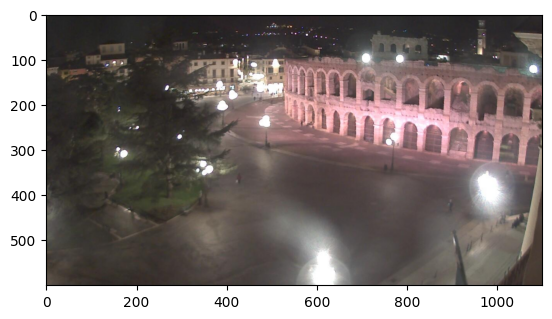

In [21]:
# Test the classifier on train data
rand_img = np.random.randint(0, len(train_std_img_list))

pred = predict_label(train_std_img_list[rand_img][0], threshold=120)

# Evaluate
print(f'Image {rand_img}')
print(f'Actual label: {train_std_img_list[rand_img][1]}')
print(f'Predicted label: {pred}')
plt.imshow(train_std_img_list[rand_img][0])

- **`rand_img = np.random.randint(0, len(train_std_img_list))`**: Memilih gambar secara acak dari daftar gambar yang telah diproses (`train_std_img_list`).

- **`pred = predict_label(train_std_img_list[rand_img][0], threshold=120)`**: Menggunakan fungsi `predict_label` untuk memprediksi label gambar yang dipilih berdasarkan ambang batas kecerahan 120.

- **`print(f'Image {rand_img}')`**: Menampilkan indeks gambar yang diuji.

- **`print(f'Actual label: {train_std_img_list[rand_img][1]}')`**: Menampilkan label sebenarnya dari gambar yang diuji.

- **`print(f'Predicted label: {pred}')`**: Menampilkan label yang diprediksi oleh model.

- **`plt.imshow(train_std_img_list[rand_img][0])`**: Menampilkan gambar yang diuji agar dapat dilihat hasil visualnya.

## Langkah 6 - Evaluasi (Manual)


In [22]:
def evaluate(img_list, threshold):
    miss_labels = []

    for file in img_list:
        # Get the ground truth / correct label
        img = file[0]
        label = file[1]

        # Get prediction
        pred_label = predict_label(img, threshold)

        # Compare ground truth and pred
        if pred_label != label:
            miss_labels.append((img, pred_label, label))

    total_img = len(img_list)
    corr_pred = total_img - len(miss_labels)
    accuracy = corr_pred / total_img

    print(f'Accuracy: {accuracy:.4f}')

- **`def evaluate(img_list, threshold):`**: Mendefinisikan fungsi `evaluate` yang menerima dua argumen: `img_list` (daftar gambar yang telah diproses) dan `threshold` (ambang batas untuk prediksi).

- **`miss_labels = []`**: Membuat daftar kosong untuk menyimpan gambar yang labelnya tidak sesuai dengan prediksi.

- **`for file in img_list:`**: Melakukan iterasi melalui setiap gambar dalam `img_list`.

- **`img = file[0]`**: Mengambil gambar dari tuple `(gambar, label)`.

- **`label = file[1]`**: Mengambil label dari tuple `(gambar, label)`.

- **`pred_label = predict_label(img, threshold)`**: Menggunakan fungsi `predict_label` untuk memprediksi label gambar dengan ambang batas yang diberikan.

- **`if pred_label != label:`**: Memeriksa apakah label prediksi berbeda dari label sebenarnya.

- **`miss_labels.append((img, pred_label, label))`**: Jika label prediksi berbeda, menyimpan gambar dan informasi label yang salah dalam `miss_labels`.

- **`total_img = len(img_list)`**: Menghitung total jumlah gambar.

- **`corr_pred = total_img - len(miss_labels)`**: Menghitung jumlah prediksi yang benar dengan mengurangi jumlah label yang salah dari total gambar.

- **`accuracy = corr_pred / total_img`**: Menghitung akurasi sebagai rasio prediksi yang benar terhadap total gambar.

- **`print(f'Accuracy: {accuracy:.4f}')`**: Menampilkan akurasi dengan format 4 angka di belakang koma.

In [23]:
# Evaluate on train data
evaluate(train_std_img_list, threshold=120)

Accuracy: 0.8417


- **`evaluate(train_std_img_list, threshold=120)`**: Fungsi `evaluate` digunakan untuk mengevaluasi kinerja model pada data pelatihan . Dengan menggunakan ambang batas (`threshold`) 120

In [24]:
# Evaluate on test data

# Load test data
test_img = load_dataset(test_dir)

# Preprocess
test_std_img_list = preprocess(test_img)

# Predict
evaluate(test_std_img_list, threshold=120)

Accuracy: 0.8688


* test_img = load_dataset(test_dir): Memuat gambar-gambar dari direktori uji dan mengaitkannya dengan label menggunakan fungsi load_dataset.
* test_std_img_list = preprocess(test_img): Melakukan pra-pemrosesan pada gambar-gambar uji, termasuk standarisasi ukuran gambar dan pengkodean label.
* evaluate(test_std_img_list, threshold=120): Mengevaluasi akurasi model pada data uji dengan ambang batas kecerahan 120.

## Another Way - Membuat Feature Vectors dan Klasifikasi dengan SVM

### Langkah 4 alternatif - Membuat Feature Vectors


In [25]:
# Create function to extract feature for every images and stored in tabular data
# Stored in Pandas dataframe
def extract_avg_bright_feature(img_list):
    avg_list = []
    labels = []

    for img in img_list:
        img_avg = avg_brightness(img[0]) # Get the avg brightness from image
        img_label = img[1] # Get the image label

        avg_list.append(img_avg)
        labels.append(img_label)

    # Stack data in columcular way
    data = np.column_stack((avg_list, labels))
    # Create a Pandas dataframe
    df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])

    return df

* **`def extract_avg_bright_feature(img_list):`** Mendefinisikan fungsi `extract_avg_bright_feature` yang mengambil argumen `img_list` berupa daftar gambar dan label.
* **`avg_list = []`** Membuat daftar kosong `avg_list` untuk menyimpan nilai rata-rata kecerahan dari setiap gambar.
* **`labels = []`** Membuat daftar kosong `labels` untuk menyimpan label dari setiap gambar.
* **`for img in img_list:`** Melakukan iterasi untuk setiap item dalam `img_list`.
* **`img_avg = avg_brightness(img[0])`** Menghitung nilai rata-rata kecerahan gambar dengan fungsi `avg_brightness` dan menyimpannya dalam `img_avg`.
* **`img_label = img[1]`** Mengambil label gambar dari item saat ini dan menyimpannya dalam `img_label`.
*  **`avg_list.append(img_avg)`** Menambahkan nilai rata-rata kecerahan (`img_avg`) ke dalam daftar `avg_list`.
*  **`labels.append(img_label)`** Menambahkan label gambar (`img_label`) ke dalam daftar `labels`.
* **`data = np.column_stack((avg_list, labels))`** Menggabungkan `avg_list` dan `labels` menjadi array 2D dengan `avg_list` sebagai kolom pertama dan `labels` sebagai kolom kedua.
* **`df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])`** Membuat DataFrame Pandas `df` dari array `data`, dengan nama kolom `AVG_BRIGHT` untuk rata-rata kecerahan dan `LABELS` untuk label.
* **`return df`** Mengembalikan DataFrame `df` yang berisi fitur rata-rata kecerahan dan label gambar.

In [26]:
# Extract feature on train data
train_avg_img = extract_avg_bright_feature(train_std_img_list)
print(f'Shape: {train_avg_img.shape}')
train_avg_img.head()

Shape: (240, 2)


,AVG_BRIGHT,LABELS
0,114.386045,0.0
1,38.835795,0.0
2,72.196842,0.0
3,111.492982,0.0
4,30.474629,0.0


* **`train_avg_img = extract_avg_bright_feature(train_std_img_list)`** Menjalankan fungsi `extract_avg_bright_feature` pada `train_std_img_list` untuk mengekstrak fitur rata-rata kecerahan dari gambar-gambar pelatihan dan menyimpannya dalam DataFrame `train_avg_img`.
* **`print(f'Shape: {train_avg_img.shape}')`** Menampilkan bentuk DataFrame `train_avg_img`, yaitu jumlah baris dan kolom yang menunjukkan berapa banyak gambar dan fitur yang ada.
*  **`train_avg_img.head()`** Menampilkan lima baris pertama dari DataFrame `train_avg_img` untuk melihat contoh data yang telah diekstraksi.

In [27]:
# Do the same thing on test data
test_avg_img = extract_avg_bright_feature(test_std_img_list)
print(f'Shape: {test_avg_img.shape}')
test_avg_img.head()

Shape: (160, 2)


,AVG_BRIGHT,LABELS
0,133.870114,1.0
1,131.480220,1.0
2,127.443791,1.0
3,154.449520,1.0
4,129.345136,1.0


* **`test_avg_img = extract_avg_bright_feature(test_std_img_list)`** Menjalankan fungsi `extract_avg_bright_feature` pada `test_std_img_list` untuk mengekstrak fitur rata-rata kecerahan dari gambar-gambar uji dan menyimpannya dalam DataFrame `test_avg_img`.
* **`print(f'Shape: {test_avg_img.shape}')`** Menampilkan bentuk DataFrame `test_avg_img`
* **`test_avg_img.head()`** Menampilkan lima baris pertama dari DataFrame `test_avg_img`

### Langkah 5 alternatif


In [28]:
# import requied library
from sklearn.svm import SVC

# Split data and label
X_train = train_avg_img.iloc[:,0].values.reshape(-1,1)
y_train = train_avg_img.iloc[:,1]
X_test = test_avg_img.iloc[:,0].values.reshape(-1,1)
y_test = test_avg_img.iloc[:,1]

model = SVC()
model.fit(X_train, y_train)

SVC()

* Mengimpor kelas `SVC` dari library `sklearn.svm`, yang digunakan untuk membuat model Support Vector Classification.
*  **`X_train = train_avg_img.iloc[:,0].values.reshape(-1,1)`** Mengambil kolom pertama dari DataFrame `train_avg_img` (yaitu fitur rata-rata kecerahan), mengubahnya menjadi array NumPy, dan kemudian mengubah bentuk array menjadi dua dimensi dengan `reshape(-1,1)` untuk keperluan pelatihan model.
* **`y_train = train_avg_img.iloc[:,1]`** Mengambil kolom kedua dari DataFrame `train_avg_img` (yaitu label), yang akan digunakan sebagai target untuk model pelatihan.
* **`X_test = test_avg_img.iloc[:,0].values.reshape(-1,1)`** Mengambil kolom pertama dari DataFrame `test_avg_img` (yaitu fitur rata-rata kecerahan), mengubahnya menjadi array NumPy, dan kemudian mengubah bentuk array menjadi dua dimensi dengan `reshape(-1,1)` untuk keperluan pengujian model.
* **`y_test = test_avg_img.iloc[:,1]`** Mengambil kolom kedua dari DataFrame `test_avg_img` (yaitu label), yang akan digunakan sebagai target untuk evaluasi model.
* **`model = SVC()`** Membuat instance dari model `SVC` dengan parameter default.
* **`model.fit(X_train, y_train)`** Melatih model `SVC` dengan data pelatihan `X_train` dan label `y_train`.

### Langkah 6 alternatif


In [29]:
from sklearn.metrics import accuracy_score

# Make a prediction on train data
y_train_pred = model.predict(X_train)

# Get the accuracy on train data
acc_train = accuracy_score(y_train, y_train_pred)

# Make a prediction on test data
y_test_pred = model.predict(X_test)

# Get the accuracy on test data
acc_test = accuracy_score(y_test, y_test_pred)

# Print Eval Result
print(f'Accuracy on train: {acc_train}')
print(f'Accuracy on test: {acc_test}')

Accuracy on train: 0.8583333333333333
Accuracy on test: 0.9


* Mengimpor fungsi `accuracy_score` dari library `sklearn.metrics` untuk menghitung akurasi model.
* **`y_train_pred = model.predict(X_train)`** Menggunakan model yang telah dilatih untuk memprediksi label dari data pelatihan `X_train`.
* **`acc_train = accuracy_score(y_train, y_train_pred)`**
Menghitung akurasi prediksi model pada data pelatihan dengan membandingkan label yang diprediksi `y_train_pred` dengan label sebenarnya `y_train`.
* **`y_test_pred = model.predict(X_test)`** Menggunakan model yang telah dilatih untuk memprediksi label dari data pengujian `X_test`.
* **`acc_test = accuracy_score(y_test, y_test_pred)`** Menghitung akurasi prediksi model pada data pengujian dengan membandingkan label yang diprediksi `y_test_pred` dengan label sebenarnya `y_test`.
* **`print(f'Accuracy on train: {acc_train}')`** Mencetak akurasi model pada data pelatihan.
* **`print(f'Accuracy on test: {acc_test}')`** Mencetak akurasi model pada data pengujian.

## Tugas 1

1. Buatlah model klasifikasi dengan menggunakan SVM untuk data suara, voice.csv.

* Memuat dataset suara ke dalam DataFrame pandas
* Encode kolom 'label' (target) menjadi nilai numerik (0 dan 1)
* Memisahkan fitur (X) dan target (y)
* Membagi dataset menjadi set pelatihan (80%) dan pengujian (20%)
* Melakukan standarisasi pada fitur menggunakan StandardScaler
* Fit dan transformasi data latih, serta transformasi data uji
* Inisialisasi model SVM dengan kernel RBF dan parameter C=100
* Melatih model SVM menggunakan data latih
* Memprediksi data uji menggunakan model yang sudah dilatih
* Menghitung akurasi model




In [34]:
# Import library yang dibutuhkan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Memuat dataset suara ke dalam DataFrame pandas
voice_data = pd.read_csv('data/voice.csv')

# Encode kolom 'label' (target) menjadi nilai numerik (0 dan 1)
label_encoder = LabelEncoder()
voice_data['label'] = label_encoder.fit_transform(voice_data['label'])

# Memisahkan fitur (X) dan target (y)
X = voice_data.drop(columns=['label'])
y = voice_data['label']

# Membagi dataset menjadi set pelatihan (80%) dan pengujian (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melakukan standarisasi pada fitur menggunakan StandardScaler
scaler = StandardScaler()

# Fit dan transformasi data latih, serta transformasi data uji
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Inisialisasi model SVM dengan kernel RBF dan parameter C=100
model = SVC(kernel='rbf', C=100)

# Melatih model SVM menggunakan data latih
model.fit(X_train, y_train)

# Memprediksi data uji menggunakan model yang sudah dilatih
y_pred = model.predict(X_test)

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)

# Menampilkan akurasi model
print(f'Akurasi model SVM: {accuracy * 100:.2f}%')

# Menampilkan classification report untuk memberikan metrik tambahan
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print("\nClassification Report:")
print(report)

Akurasi model SVM: 97.95%

Classification Report:
              precision    recall  f1-score   support

      female       0.97      0.98      0.98       297
        male       0.99      0.98      0.98       337

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



2. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,

* Menggunakan data spam.csv
* Fitur CountVectorizer dengan mengaktifkan stop_words
* Evaluasi hasilnya

<br>

* Memuat data: Baca file spam.csv dan pilih kolom label dan pesan.
* Membersihkan data: Hapus kolom yang tidak perlu, ganti nama kolom.
* Membagi data: Pisahkan data menjadi data latih dan uji (80/20).
* Vectorization: Gunakan CountVectorizer untuk mengubah teks menjadi fitur numerik (aktifkan stop_words).
* Melatih model: Gunakan algoritma Multinomial Naive Bayes pada data latih.
* Prediksi: Gunakan model untuk memprediksi data uji.
* Evaluasi: Tampilkan laporan klasifikasi dan akurasi model.

In [39]:
# Import library yang diperlukan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Langkah 1: Memuat data
data = pd.read_csv('data/spam.csv', encoding='latin-1')

# Langkah 2: Membersihkan dataset dengan menghapus kolom yang tidak diperlukan dan mengganti nama kolom
data_cleaned = data[['v1', 'v2']].rename(columns={'v1': 'label', 'v2': 'pesan'})

# Langkah 3: Membagi data menjadi data latih (train) dan data uji (test)
X = data_cleaned['pesan']  # Fitur (pesan teks)
y = data_cleaned['label']  # Target label (spam atau ham)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Langkah 4: Menggunakan CountVectorizer untuk mengubah data teks menjadi vektor fitur, serta mengaktifkan stop_words
vectorizer = CountVectorizer(stop_words='english')  # Mengabaikan kata-kata umum yang tidak penting
X_train_vec = vectorizer.fit_transform(X_train)  # Transformasi data latih
X_test_vec = vectorizer.transform(X_test)  # Transformasi data uji

# Langkah 5: Melatih model Multinomial Naive Bayes
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Langkah 6: Melakukan prediksi pada data uji
y_pred = model.predict(X_test_vec)

# Langkah 7: Mengevaluasi kinerja model
# Menampilkan hasil evaluasi dalam bentuk classification report (precision, recall, f1-score)
# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi model: {accuracy * 100:.2f}%")

print("Hasil Evaluasi Model:")
print(classification_report(y_test, y_pred))

Akurasi model: 98.39%
Hasil Evaluasi Model:
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       965
        spam       0.96      0.92      0.94       150

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



3. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,

* Menggunakan data spam.csv
* Fitur TF-IDF dengan mengaktifkan stop_words
* Evaluasi hasilnya dan bandingkan dengan hasil pada Tugas no 2.
* Berikan kesimpulan fitur mana yang terbaik pada kasus data spam.csv

In [41]:
# Import library yang diperlukan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Langkah 1: Memuat data
data = pd.read_csv('data/spam.csv', encoding='latin-1')

# Langkah 2: Membersihkan dataset dengan menghapus kolom yang tidak diperlukan dan mengganti nama kolom
data_cleaned = data[['v1', 'v2']].rename(columns={'v1': 'label', 'v2': 'pesan'})

# Langkah 3: Membagi data menjadi data latih (train) dan data uji (test)
X = data_cleaned['pesan']  # Fitur (pesan teks)
y = data_cleaned['label']  # Target label (spam atau ham)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Langkah 4: Menggunakan TF-IDF Vectorizer untuk mengubah data teks menjadi vektor fitur
vectorizer_tfidf = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer_tfidf.fit_transform(X_train)
X_test_tfidf = vectorizer_tfidf.transform(X_test)

# Langkah 5: Melatih model Multinomial Naive Bayes dengan fitur TF-IDF
model_tfidf = MultinomialNB()
model_tfidf.fit(X_train_tfidf, y_train)

# Langkah 6: Melakukan prediksi pada data uji
y_pred_tfidf = model_tfidf.predict(X_test_tfidf)

# Langkah 7: Mengevaluasi kinerja model dengan TF-IDF
print("Hasil Evaluasi Model dengan TF-IDF:")
print(classification_report(y_test, y_pred_tfidf))

# Menghitung akurasi model dengan TF-IDF
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
print(f"Akurasi model dengan TF-IDF: {accuracy_tfidf * 100:.2f}%")

# ---------------------------------------------------
# Perbandingan dengan model sebelumnya yang menggunakan CountVectorizer

# Menggunakan CountVectorizer seperti pada tugas sebelumnya
vectorizer_cv = CountVectorizer(stop_words='english')
X_train_cv = vectorizer_cv.fit_transform(X_train)
X_test_cv = vectorizer_cv.transform(X_test)

# Melatih model Multinomial Naive Bayes dengan fitur CountVectorizer
model_cv = MultinomialNB()
model_cv.fit(X_train_cv, y_train)

# Melakukan prediksi pada data uji
y_pred_cv = model_cv.predict(X_test_cv)

# Evaluasi kinerja model dengan CountVectorizer
print("\nHasil Evaluasi Model dengan CountVectorizer:")
print(classification_report(y_test, y_pred_cv))

# Menghitung akurasi model dengan CountVectorizer
accuracy_cv = accuracy_score(y_test, y_pred_cv)
print(f"Akurasi model dengan CountVectorizer: {accuracy_cv * 100:.2f}%")

# ---------------------------------------------------
# Kesimpulan
if accuracy_tfidf > accuracy_cv:
    print("\nKesimpulan: Model dengan fitur TF-IDF lebih baik untuk data spam.csv.")
else:
    print("\nKesimpulan: Model dengan fitur CountVectorizer lebih baik untuk data spam.csv.")


Hasil Evaluasi Model dengan TF-IDF:
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115

Akurasi model dengan TF-IDF: 96.68%

Hasil Evaluasi Model dengan CountVectorizer:
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       965
        spam       0.96      0.92      0.94       150

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Akurasi model dengan CountVectorizer: 98.39%

Kesimpulan: Model dengan fitur CountVectorizer lebih baik untuk data spam.csv.


## Tugas 2

Buatlah model klasifikasi dengan menggunakan SVM berdasarkan data pada Percobaan 5 dengan menggunakan fitur histogram.

* Ekstraksi Histogram: Fungsi extract_histogram() digunakan untuk mengekstrak histogram dari gambar pada ruang warna HSV. Histogram untuk setiap saluran H (Hue), S (Saturation), dan V (Value) dihitung dan dinormalisasi.() memproses daftar gambar, mengekstrak fitur histogram, dan menghasilkan array fitur (X) dan array label (y).
Pelatihan Model SVM:
* Fitur histogram digunakan untuk melatih model SVM dengan kernel rbf dan parameter C=100.
* Evaluasi:Model dievaluasi menggunakan akurasi dan classification report.
* Visualisasi:Fungsi random_test_img_viz() digunakan untuk menampilkan gambar uji acak beserta label asli dan prediksi model.

Shape	: (737, 1024, 3)
Label	: night


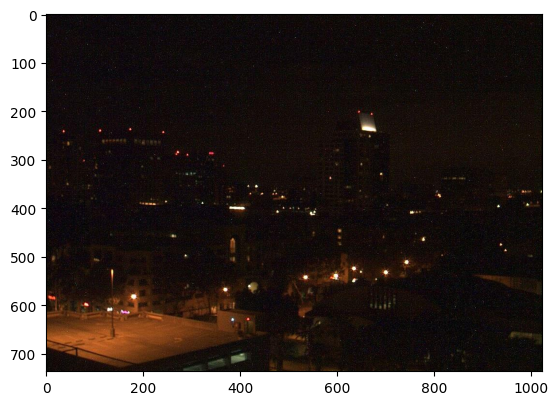

In [43]:
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

train_dir = "images/training/"
test_dir = "images/test/"

def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

train_img = load_dataset(train_dir)

# Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

random_img_viz(train_img)

Shape	: (600, 1100, 3)
Label	: 0


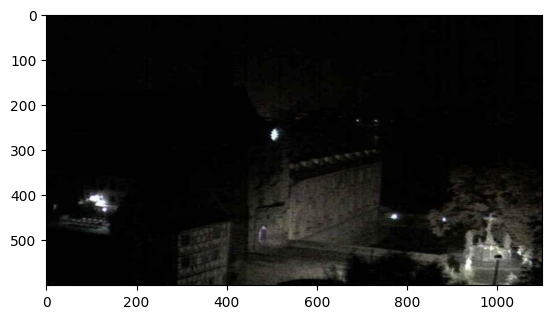

In [50]:
def standarized_input(image):
    std_img = cv2.resize(image, (1100,600))

    return std_img

def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1

    return num_val

def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))

    return std_img_list

train_std_img_list = preprocess(train_img)

random_img_viz(train_std_img_list)

Akurasi: 98.12%

Laporan Klasifikasi:
              precision    recall  f1-score   support

       night       0.99      0.97      0.98        80
         day       0.98      0.99      0.98        80

    accuracy                           0.98       160
   macro avg       0.98      0.98      0.98       160
weighted avg       0.98      0.98      0.98       160

Label Asli	: night
Label Prediksi	: night


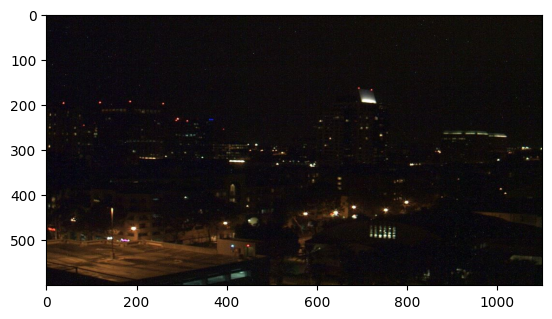

In [53]:
# Fungsi untuk mengekstrak fitur histogram dari gambar
def extract_histogram(image, bins=32):
    # Mengubah gambar ke dalam ruang warna HSV (berguna untuk ekstraksi fitur berbasis warna)
    hsv_img = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Menghitung histogram untuk setiap channel (H, S, V) dan menormalisasi
    hist_h = cv2.calcHist([hsv_img], [0], None, [bins], [0, 256])
    hist_s = cv2.calcHist([hsv_img], [1], None, [bins], [0, 256])
    hist_v = cv2.calcHist([hsv_img], [2], None, [bins], [0, 256])

    # Normalisasi histogram
    hist_h = cv2.normalize(hist_h, hist_h).flatten()
    hist_s = cv2.normalize(hist_s, hist_s).flatten()
    hist_v = cv2.normalize(hist_v, hist_v).flatten()

    # Menggabungkan histogram dari ketiga channel menjadi satu vektor fitur
    hist_features = np.concatenate([hist_h, hist_s, hist_v])

    return hist_features

# Fungsi untuk memproses daftar gambar dan mengekstrak fitur serta labelnya
def extract_features_and_labels(img_list, bins=32):
    features = []  # Menyimpan fitur dari gambar
    labels = []    # Menyimpan label dari gambar

    for item in img_list:
        image = item[0]
        label = item[1]

        # Ekstraksi fitur histogram dari gambar
        hist_features = extract_histogram(image, bins=bins)

        # Menambahkan fitur dan label ke daftar
        features.append(hist_features)
        labels.append(label)

    return np.array(features), np.array(labels)

# Ekstraksi fitur dan label untuk data latih
X_train, y_train = extract_features_and_labels(train_std_img_list)

# Memuat dataset pengujian
test_img = load_dataset(test_dir)
test_std_img_list = preprocess(test_img)

# Ekstraksi fitur dan label untuk data uji
X_test, y_test = extract_features_and_labels(test_std_img_list)

# Import library SVM dan evaluasi
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Standarisasi fitur (agar distribusi data seimbang)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Melatih model SVM dengan kernel RBF dan parameter C=100
svm_model = SVC(kernel='rbf', C=100)
svm_model.fit(X_train_scaled, y_train)

# Melakukan prediksi pada set data uji
y_pred = svm_model.predict(X_test_scaled)

# Evaluasi model dengan menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy * 100:.2f}%')

# Menampilkan laporan klasifikasi (classification report)
report = classification_report(y_test, y_pred, target_names=['night', 'day'])
print("\nLaporan Klasifikasi:")
print(report)

# Fungsi untuk visualisasi gambar uji acak dengan prediksi
def random_test_img_viz(img_list, predictions):
    rand_num = np.random.randint(0, len(img_list))  # Memilih gambar secara acak

    img = img_list[rand_num][0]
    actual_label = img_list[rand_num][1]
    predicted_label = predictions[rand_num]

    actual_str = 'day' if actual_label == 1 else 'night'
    predicted_str = 'day' if predicted_label == 1 else 'night'

    plt.imshow(img)
    print(f'Label Asli\t: {actual_str}')
    print(f'Label Prediksi\t: {predicted_str}')

# Visualisasi gambar uji acak dengan prediksi
random_test_img_viz(test_std_img_list, y_pred)
